**DROPOUT AND BATCH NORMALIZATION**

In [3]:
import pandas as pd
red_wine = pd.read_csv('../../../data/red-wine.csv')

In [4]:
from sklearn.model_selection import train_test_split
y = red_wine['quality']
X = red_wine.drop(['quality'], axis=1)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, 
        train_size=0.7, test_size=0.3, random_state=0)

In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
  layers.Dense(1024, activation='relu', input_shape=[11]),
  layers.Dropout(0.3),
  layers.BatchNormalization(),
  layers.Dense(1024, activation='relu'),
  layers.Dropout(0.3),
  layers.BatchNormalization(),
  layers.Dense(1024, activation='relu'),
  layers.Dropout(0.3),
  layers.BatchNormalization(),
  layers.Dense(1),
])

/Users/asaucedo/workspaces/python3/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/asaucedo/workspaces/python3/.venv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(
  optimizer='adam',
  loss='mae',
)

In [7]:
history = model.fit(
  X_train, y_train,
  validation_data=(X_valid, y_valid),
  batch_size=256,
  epochs=100,
)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 5.6101 - val_loss: 5.4551
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 5.3850 - val_loss: 6.3454
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 5.1617 - val_loss: 8.6783
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 4.8991 - val_loss: 4.1178
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 4.6160 - val_loss: 5.5277
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 4.3496 - val_loss: 7.0636
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 4.0178 - val_loss: 7.5840
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 3.6556 - val_loss: 4.9511
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 3.1882 - val_loss: 6.6012
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 2.7797 - val_loss: 4.7958
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 2.4775 - val_loss: 7.0697
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 2.0857 - val_lo

<Axes: >

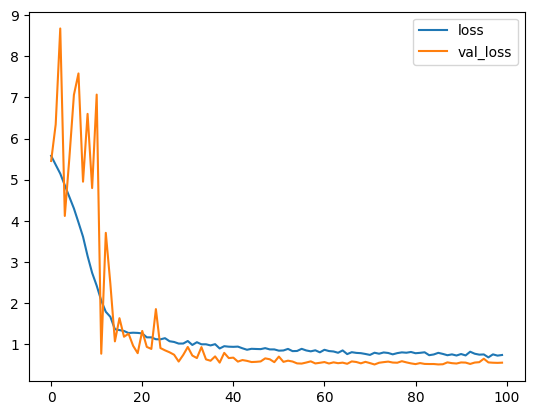

In [8]:
history_df = pd.DataFrame(history.history)
history_df.plot()